# Action1  选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像      
1、完成代码，结果正确（10points）    

In [82]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
    # 对于S，只保留前K%个特征值
    s_temp = np.zeros(s.shape[0])
    s_temp[0:int(s.shape[0]*k/100)] = s[0:int(s.shape[0]*k/100)]
    s = s_temp * np.identity(s.shape[0])
    # 用新的s_temp，以及p,q重构A
    temp = np.dot(p,s)
    temp = np.dot(temp,q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
#     print(A-temp)

In [39]:
# 加载256色图片,并且灰度处理
image_pre = Image.open('./Pikachu.png')
A_pre = np.array(image_pre)
image = image_pre.convert("L")
A = np.array(image)

In [58]:
A.shape

(1749, 2006)

In [56]:
A_pre[0:5]

array([[[224, 164,  79, 255],
        [225, 165,  81, 255],
        [226, 165,  81, 255],
        ...,
        [200, 142,  96, 255],
        [198, 137,  93, 255],
        [193, 133,  89, 255]],

       [[224, 164,  80, 255],
        [225, 165,  81, 255],
        [226, 165,  81, 255],
        ...,
        [202, 142,  96, 255],
        [200, 138,  94, 255],
        [195, 134,  90, 255]],

       [[224, 164,  80, 255],
        [226, 165,  81, 255],
        [226, 165,  81, 255],
        ...,
        [205, 142,  96, 255],
        [203, 137,  93, 255],
        [198, 133,  89, 255]],

       [[225, 164,  80, 255],
        [226, 165,  81, 255],
        [226, 165,  81, 255],
        ...,
        [207, 140,  94, 255],
        [205, 135,  91, 255],
        [200, 131,  86, 255]],

       [[225, 164,  80, 255],
        [226, 165,  81, 255],
        [226, 165,  81, 255],
        ...,
        [209, 137,  91, 255],
        [206, 132,  88, 255],
        [201, 128,  83, 255]]], dtype=uint8)

In [55]:
A[0:5]

array([[172, 173, 174, ..., 154, 150, 146],
       [172, 173, 174, ..., 155, 152, 147],
       [172, 174, 174, ..., 156, 152, 147],
       [173, 174, 174, ..., 155, 151, 147],
       [173, 174, 174, ..., 153, 149, 145]], dtype=uint8)

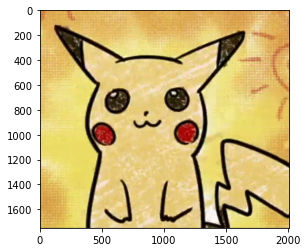

In [41]:
# 显示原图
plt.imshow(A_pre)

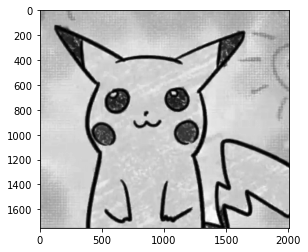

In [42]:
# 显示原灰度图
plt.imshow(A,cmap='gray')

In [83]:
# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)

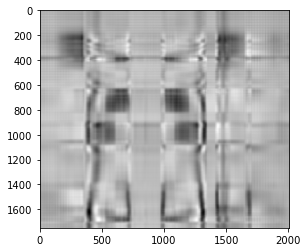

In [84]:
# 取前0.3%个特征，对图像进行还原(特征向量对角阵取前1%行)
get_image_feature(s, 0.3)

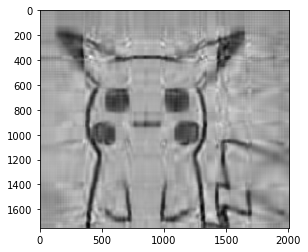

In [85]:
# 取前0.7%个特征，对图像进行还原
get_image_feature(s, 0.7)

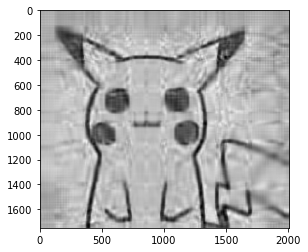

In [86]:
# 取前1%个特征，对图像进行还原
get_image_feature(s, 1)

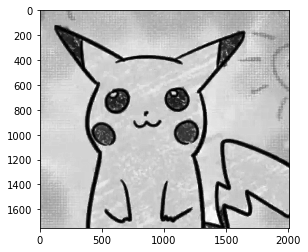

In [87]:
# 取前50%个特征，对图像进行还原
get_image_feature(s, 50)

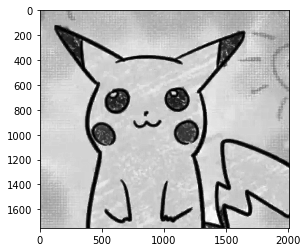

In [88]:
# 取500%个特征，对图像进行还原
get_image_feature(s, 500)